In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor



In [2]:
data = pd.read_csv('finaldata6.csv')

In [3]:
data


,Unnamed: 0,Relay Height,Amplitude,Time Period,Time Constant,Delay
0,0,6.0,0.0655,2.5988,48.241712,1.959681
1,1,6.0,0.0830,2.7200,39.844859,2.054050
2,2,6.0,0.0960,2.8004,35.466772,2.117041
3,3,6.0,0.0840,2.8240,40.875800,2.132764
4,4,6.0,0.0625,2.8216,54.891868,2.127160
...,...,...,...,...,...,...
191,191,12.0,0.3530,18.4440,127.028622,14.036070
192,192,12.0,0.2600,20.3600,190.405133,15.434983
193,193,12.0,0.2770,21.5952,189.558470,16.382866
194,194,12.0,0.3115,22.1608,172.971370,16.835846


In [4]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)


In [5]:
y = data['Delay']


In [6]:
X=data.iloc[:,:-2]

In [7]:
X

,Relay Height,Amplitude,Time Period
0,6.0,0.0655,2.5988
1,6.0,0.0830,2.7200
2,6.0,0.0960,2.8004
3,6.0,0.0840,2.8240
4,6.0,0.0625,2.8216
...,...,...,...
191,12.0,0.3530,18.4440
192,12.0,0.2600,20.3600
193,12.0,0.2770,21.5952
194,12.0,0.3115,22.1608


In [8]:
y

0       1.959681
1       2.054050
2       2.117041
3       2.132764
4       2.127160
         ...    
191    14.036070
192    15.434983
193    16.382866
194    16.835846
195    17.585075
Name: Delay, Length: 196, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [10]:
X_train

,Relay Height,Amplitude,Time Period
58,8.0,0.2100,1.34210
14,6.0,0.1090,4.40420
47,6.0,0.0535,3.85904
19,6.0,0.1080,4.76000
81,8.0,0.2035,7.80000
...,...,...,...
133,10.0,0.2005,7.24160
137,10.0,0.2210,10.95000
72,8.0,0.2315,3.74160
140,10.0,0.1810,16.23440


In [11]:
y_train

58      1.019758
14      3.333057
47      2.907098
19      3.602026
81      5.924237
         ...    
133     5.485490
137     8.303010
72      2.846723
140    12.285636
37      8.212167
Name: Delay, Length: 156, dtype: float64

In [12]:
X_test

,Relay Height,Amplitude,Time Period
127,10.0,0.4400,3.58360
11,6.0,0.0760,3.68400
110,10.0,0.3565,0.77252
124,10.0,0.3975,2.64350
18,6.0,0.1025,4.59330
165,12.0,0.5545,1.57410
44,6.0,0.0600,3.10272
28,6.0,0.1200,6.79200
171,12.0,0.5805,2.08560
136,10.0,0.2870,9.42760


In [13]:
y_test

127     2.746762
11      2.780418
110     0.589702
124     2.021978
18      3.474300
165     1.207822
44      2.338607
28      5.144792
171     1.601997
136     7.171965
51      1.971288
29      5.473027
105     0.473330
56      0.998195
53      0.934069
174     2.217147
16      3.324530
164     1.158932
143    14.114906
99      0.675350
27      4.840848
130     3.275049
78      4.534892
168     1.427774
108     0.574461
191    14.036070
31      6.644165
35      9.697648
173     2.116413
4       2.127160
113     1.266684
112     1.112236
116     1.507140
82      6.221350
186    10.736177
69      2.473459
169     1.504939
40      2.197248
102     0.511619
182     5.597733
Name: Delay, dtype: float64

In [14]:

# Initialize an empty dictionary to store R2 scores
r2_scores = {}
mse_scores = {}
r2_scores_train = {}
mse_scores_train = {}

In [15]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import r2_score, mean_squared_error

# # Assuming X and y are already defined
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# # Initialize dictionaries to store R2 scores and MSEs
# r2_scores = {}
# mse_scores = {}

# # Linear Regression with cross-validation
# linear_reg = LinearRegression()
# cv_scores_lr = cross_val_score(linear_reg, X_train, y_train, cv=5, scoring='r2')
# linear_reg.fit(X_train, y_train)
# y_pred_train_lr = linear_reg.predict(X_train)
# y_pred_test_lr = linear_reg.predict(X_test)

# # Calculate R2 and MSE for training data
# r2_train_lr = r2_score(y_train, y_pred_train_lr)
# mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)

# # Calculate R2 and MSE for testing data
# r2_test_lr = r2_score(y_test, y_pred_test_lr)
# mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)

# r2_scores['Linear Regression'] = r2_test_lr
# mse_scores['Linear Regression'] = mse_test_lr

# print(f"Cross-validated R2 scores for Linear Regression: {cv_scores_lr}")
# print(f"Training R2 score for Linear Regression: {r2_train_lr}")
# print(f"Testing R2 score for Linear Regression: {r2_test_lr}")
# print(f"Training MSE for Linear Regression: {mse_train_lr}")
# print(f"Testing MSE for Linear Regression: {mse_test_lr}")

# # Plotting Actual vs Predicted for Testing Data
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=y_test, y=y_pred_test_lr, color='blue', label='Predicted vs Actual')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Linear Regression: Actual vs Predicted')
# plt.legend()
# plt.show()


In [16]:
# linear_reg.predict([[7,2.223,8.8380]])

In [17]:
# linear_reg.predict([[1,0.1814,3.667]])

In [18]:
# linear_reg.predict([[12,1.867,11.038]])

In [19]:
# linear_reg.predict([[1,0.1601,7.332]])

In [20]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import GridSearchCV

# param_grid_poly = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}
# grid_search_poly = GridSearchCV(make_pipeline(PolynomialFeatures(), LinearRegression()), param_grid_poly, cv=5, scoring='r2')
# grid_search_poly.fit(X_train, y_train)
# cv_scores_poly = cross_val_score(grid_search_poly, X_train, y_train, cv=5, scoring='r2')
# y_pred_train_poly = grid_search_poly.predict(X_train)
# y_pred_test_poly = grid_search_poly.predict(X_test)

# # Calculate R2 and MSE for training data
# r2_train_poly = r2_score(y_train, y_pred_train_poly)
# mse_train_poly = mean_squared_error(y_train, y_pred_train_poly)

# # Calculate R2 and MSE for testing data
# r2_test_poly = r2_score(y_test, y_pred_test_poly)
# mse_test_poly = mean_squared_error(y_test, y_pred_test_poly)

# r2_scores['Polynomial Regression'] = r2_test_poly
# mse_scores['Polynomial Regression'] = mse_test_poly

# print(f"Cross-validated R2 scores for Polynomial Regression: {cv_scores_poly}")
# print(f"Training R2 score for Polynomial Regression: {r2_train_poly}")
# print(f"Testing R2 score for Polynomial Regression: {r2_test_poly}")
# print(f"Training MSE for Polynomial Regression: {mse_train_poly}")
# print(f"Testing MSE for Polynomial Regression: {mse_test_poly}")

# # Plotting Actual vs Predicted for Testing Data
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=y_test, y=y_pred_test_poly, color='blue', label='Predicted vs Actual')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Polynomial Regression: Actual vs Predicted')
# plt.legend()
# plt.show()


In [21]:
# grid_search_poly.predict([[7,2.223,8.8380]])

In [22]:
# grid_search_poly.predict([[1,0.1814,3.667]])

In [23]:
# grid_search_poly.predict([[12,1.867,11.038]])

In [24]:
# grid_search_poly.predict([[1,0.1601,7.332]])

Cross-validated R2 scores for KNN: [0.99756661 0.99886669 0.9934413  0.99610496 0.99804111]
Training R2 score for KNN: 1.0
Testing R2 score for KNN: 0.994701081086562
Training MSE for KNN: 0.0
Testing MSE for KNN: 0.06191099553704217
Best parameters for KNN: {'n_neighbors': 5, 'weights': 'distance'}


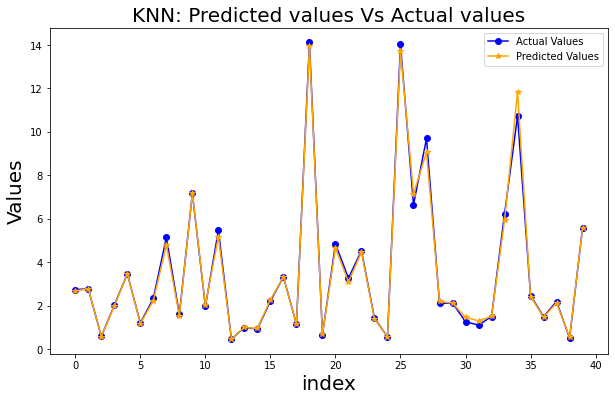

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

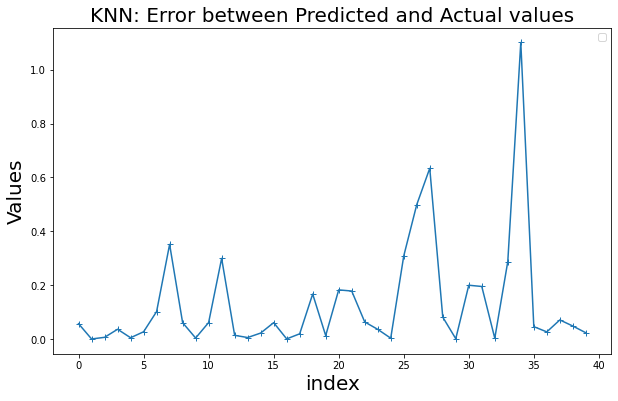

In [25]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# KNN with cross-validation
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='r2')
grid_search_knn.fit(X_train, y_train)
cv_scores_knn = cross_val_score(grid_search_knn, X_train, y_train, cv=5, scoring='r2')
y_pred_train_knn = grid_search_knn.predict(X_train)
y_pred_test_knn = grid_search_knn.predict(X_test)

# Best parameters for KNN
best_params_knn = grid_search_knn.best_params_

# Calculate R2 and MSE for training data
r2_train_knn = r2_score(y_train, y_pred_train_knn)
mse_train_knn = mean_squared_error(y_train, y_pred_train_knn)

# Calculate R2 and MSE for testing data
r2_test_knn = r2_score(y_test, y_pred_test_knn)
mse_test_knn = mean_squared_error(y_test, y_pred_test_knn)

r2_scores['KNN'] = r2_test_knn
mse_scores['KNN'] = mse_test_knn

r2_scores_train['KNN'] = r2_train_knn
mse_scores_train['KNN'] = mse_train_knn

print(f"Cross-validated R2 scores for KNN: {cv_scores_knn}")
print(f"Training R2 score for KNN: {r2_train_knn}")
print(f"Testing R2 score for KNN: {r2_test_knn}")
print(f"Training MSE for KNN: {mse_train_knn}")
print(f"Testing MSE for KNN: {mse_test_knn}")
print(f"Best parameters for KNN: {best_params_knn}")


# Plotting Actual vs Predicted for Testing Data
y_test = np.array(y_test)
fig = plt.figure(figsize = (10,6))
t = np.arange(len(y_test))
plt.plot(t, y_test, label = 'Actual Values', marker = 'o', color='blue')
plt.plot(t, y_pred_test_knn, label = 'Predicted Values', marker = '*', color='orange')
plt.title('KNN: Predicted values Vs Actual values' ,fontsize = 20)
plt.xlabel('index',fontsize = 20)
plt.ylabel('Values', fontsize = 20)
plt.legend()

plt.show()

error = []
er=0
ind = 0
for i in range(len(y_test)):
    error.append(abs(y_test[i] - y_pred_test_knn[i]))
    if(abs(y_test[i] - y_pred_test_knn[i]) > er):
        er = abs(y_test[i] - y_pred_test_knn[i])
        ind = i
        
        fig = plt.figure(figsize = (10,6))
t = np.arange(len(y_test))
plt.plot(t, error, marker = '+')
# plt.plot(t, y_pred_test_knn, label = 'Predicted Values')
plt.title('KNN: Error between Predicted and Actual values' ,fontsize = 20)
plt.xlabel('index',fontsize = 20)
plt.ylabel('Values', fontsize = 20)
plt.legend()

plt.show()





In [26]:
# grid_search_knn.predict([[12,0.1814,3.667]])

In [27]:
# grid_search_knn.predict([[1,0.1601,7.332]])

Cross-validated R2 scores for SVR: [0.99998862 0.99999154 0.99998638 0.99998708 0.99999203]
Training R2 score for SVR: 0.9999905622982476
Testing R2 score for SVR: 0.999985310691379
Training MSE for SVR: 0.00021994944732985108
Testing MSE for SVR: 0.00017162552123124123
Best parameters for SVR: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}


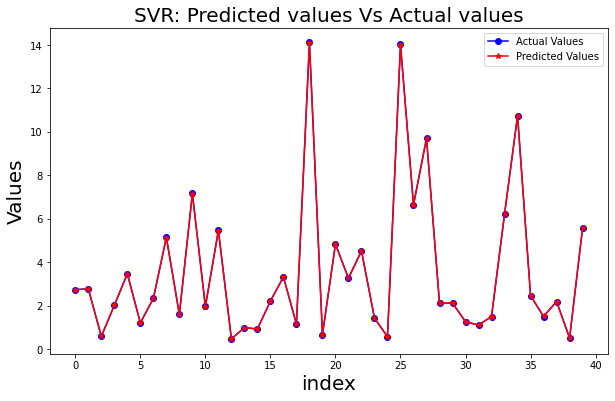

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

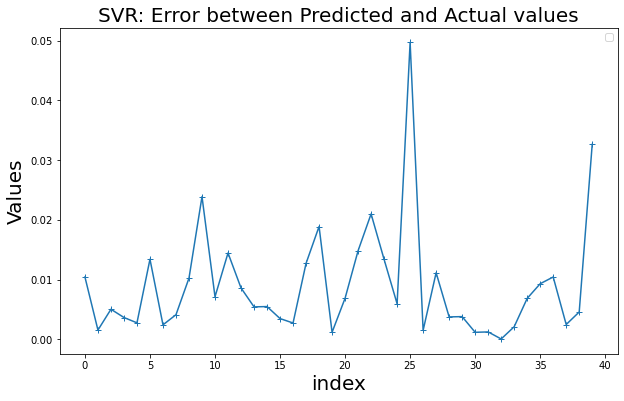

In [28]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# SVR with cross-validation
param_grid_svr = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2], 'kernel': ['linear', 'rbf']}
grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='r2')
grid_search_svr.fit(X_train, y_train)
cv_scores_svr = cross_val_score(grid_search_svr, X_train, y_train, cv=5, scoring='r2')
y_pred_train_svr = grid_search_svr.predict(X_train)
y_pred_test_svr = grid_search_svr.predict(X_test)

# Best parameters for SVR
best_params_svr = grid_search_svr.best_params_

# Calculate R2 and MSE for training data
r2_train_svr = r2_score(y_train, y_pred_train_svr)
mse_train_svr = mean_squared_error(y_train, y_pred_train_svr)

# Calculate R2 and MSE for testing data
r2_test_svr = r2_score(y_test, y_pred_test_svr)
mse_test_svr = mean_squared_error(y_test, y_pred_test_svr)

r2_scores['SVR'] = r2_test_svr
mse_scores['SVR'] = mse_test_svr

r2_scores_train['SVR'] = r2_train_svr
mse_scores_train['SVR'] = mse_train_svr

print(f"Cross-validated R2 scores for SVR: {cv_scores_svr}")
print(f"Training R2 score for SVR: {r2_train_svr}")
print(f"Testing R2 score for SVR: {r2_test_svr}")
print(f"Training MSE for SVR: {mse_train_svr}")
print(f"Testing MSE for SVR: {mse_test_svr}")
print(f"Best parameters for SVR: {best_params_svr}")

# Plotting Actual vs Predicted for Testing Data
y_test = np.array(y_test)
fig = plt.figure(figsize = (10,6))
t = np.arange(len(y_test))
plt.plot(t, y_test, label = 'Actual Values', marker = 'o', color='blue')
plt.plot(t, y_pred_test_svr, label = 'Predicted Values', marker = '*', color='red')
plt.title('SVR: Predicted values Vs Actual values' ,fontsize = 20)
plt.xlabel('index',fontsize = 20)
plt.ylabel('Values', fontsize = 20)
plt.legend()

plt.show()

error = []
er=0
ind = 0
for i in range(len(y_test)):
    error.append(abs(y_test[i] - y_pred_test_svr[i]))
    if(abs(y_test[i] - y_pred_test_svr[i]) > er):
        er = abs(y_test[i] - y_pred_test_svr[i])
        ind = i
        
        fig = plt.figure(figsize = (10,6))
t = np.arange(len(y_test))
plt.plot(t, error, marker = '+')
# plt.plot(t, y_pred_test_knn, label = 'Predicted Values')
plt.title('SVR: Error between Predicted and Actual values' ,fontsize = 20)
plt.xlabel('index',fontsize = 20)
plt.ylabel('Values', fontsize = 20)
plt.legend()

plt.show()


In [29]:
# grid_search_svr.predict([[7,2.223,8.8380]])

In [30]:
# grid_search_svr.predict([[1,0.1814,3.667]])

In [31]:
grid_search_svr.predict([[12,2.7465,10.633]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([8.36066831])

In [32]:
grid_search_svr.predict([[1,0.1601,7.332]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([5.56937763])

In [33]:
grid_search_svr.predict([[8,1.843,11.038]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([8.56735534])

In [34]:
grid_search_svr.predict([[6,0.086,0.3864]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([0.27999299])

In [35]:
grid_search_svr.predict([[11,0.5135,2.9002]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([2.22442768])

Cross-validated R2 scores for Decision Tree: [0.99842665 0.99746741 0.99866923 0.99858312 0.99897902]
Training R2 score for Decision Tree: 0.9999999224268875
Testing R2 score for Decision Tree: 0.9975720945299711
Training MSE for Decision Tree: 1.8078726865209629e-06
Testing MSE for Decision Tree: 0.028366926758989386
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


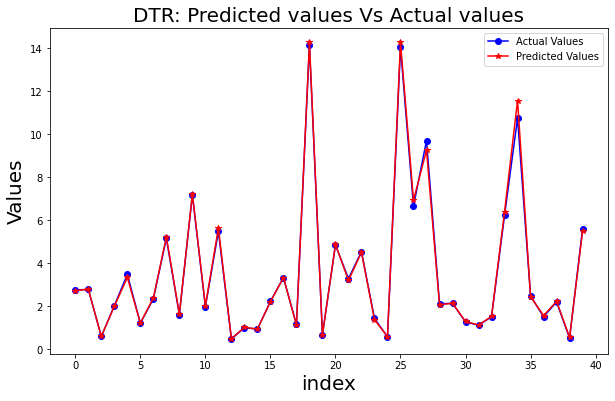

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

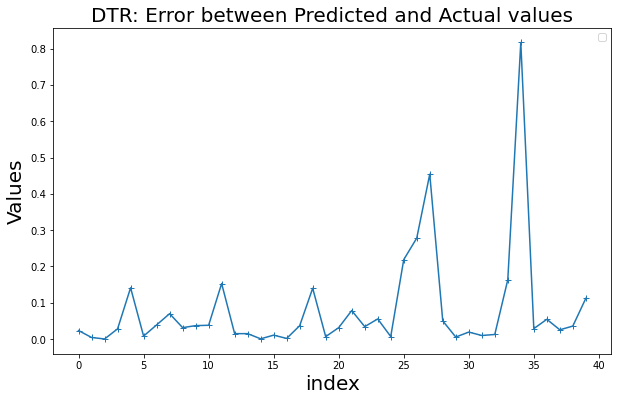

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree with cross-validation
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid_dt, cv=5, scoring='r2')
grid_search_dt.fit(X_train, y_train)
cv_scores_dt = cross_val_score(grid_search_dt, X_train, y_train, cv=5, scoring='r2')
y_pred_train_dt = grid_search_dt.predict(X_train)
y_pred_test_dt = grid_search_dt.predict(X_test)

# Best parameters for Decision Tree
best_params_dt = grid_search_dt.best_params_

# Calculate R2 and MSE for training data
r2_train_dt = r2_score(y_train, y_pred_train_dt)
mse_train_dt = mean_squared_error(y_train, y_pred_train_dt)

# Calculate R2 and MSE for testing data
r2_test_dt = r2_score(y_test, y_pred_test_dt)
mse_test_dt = mean_squared_error(y_test, y_pred_test_dt)

r2_scores['Decision Tree'] = r2_test_dt
mse_scores['Decision Tree'] = mse_test_dt

r2_scores_train['Decision Tree'] = r2_train_dt
mse_scores_train['Decision Tree'] = mse_train_dt

print(f"Cross-validated R2 scores for Decision Tree: {cv_scores_dt}")
print(f"Training R2 score for Decision Tree: {r2_train_dt}")
print(f"Testing R2 score for Decision Tree: {r2_test_dt}")
print(f"Training MSE for Decision Tree: {mse_train_dt}")
print(f"Testing MSE for Decision Tree: {mse_test_dt}")
print(f"Best parameters for Decision Tree: {best_params_dt}")

# Plotting Actual vs Predicted for Testing Data
y_test = np.array(y_test)
fig = plt.figure(figsize = (10,6))
t = np.arange(len(y_test))
plt.plot(t, y_test, label = 'Actual Values', marker = 'o', color='blue')
plt.plot(t, y_pred_test_dt, label = 'Predicted Values', marker = '*', color='red')
plt.title('DTR: Predicted values Vs Actual values' ,fontsize = 20)
plt.xlabel('index',fontsize = 20)
plt.ylabel('Values', fontsize = 20)
plt.legend()

plt.show()

error = []
er=0
ind = 0
for i in range(len(y_test)):
    error.append(abs(y_test[i] - y_pred_test_dt[i]))
    if(abs(y_test[i] - y_pred_test_dt[i]) > er):
        er = abs(y_test[i] - y_pred_test_dt[i])
        ind = i
        
        fig = plt.figure(figsize = (10,6))
t = np.arange(len(y_test))
plt.plot(t, error, marker = '+')
# plt.plot(t, y_pred_test_dt, label = 'Predicted Values')
plt.title('DTR: Error between Predicted and Actual values' ,fontsize = 20)
plt.xlabel('index',fontsize = 20)
plt.ylabel('Values', fontsize = 20)
plt.legend()

plt.show()


In [37]:
grid_search_dt.predict([[7,2.223,8.8380]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([6.96623116])

In [38]:
grid_search_dt.predict([[1,0.1814,3.667]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([2.78480057])

In [39]:
grid_search_dt.predict([[12,2.7465,10.633]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([7.8864186])

In [40]:
grid_search_dt.predict([[1,0.1601,7.332]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([5.62594569])

In [41]:
grid_search_dt.predict([[8,1.843,11.038]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([8.38113181])

In [42]:
grid_search_dt.predict([[6,0.086,0.3864]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.35138955])

In [43]:
grid_search_dt.predict([[11,0.5135,2.9002]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([2.20634317])

Cross-validated R2 scores for Random Forest: [0.99923574 0.99904684 0.99912033 0.99898815 0.99694152]
Training R2 score for Random Forest: 0.999897653083293
Testing R2 score for Random Forest: 0.9977045398088688
Training MSE for Random Forest: 0.002385236189502843
Testing MSE for Random Forest: 0.02681947543831729
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


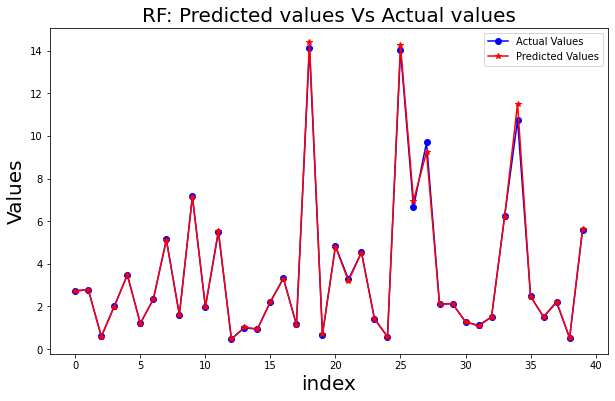

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

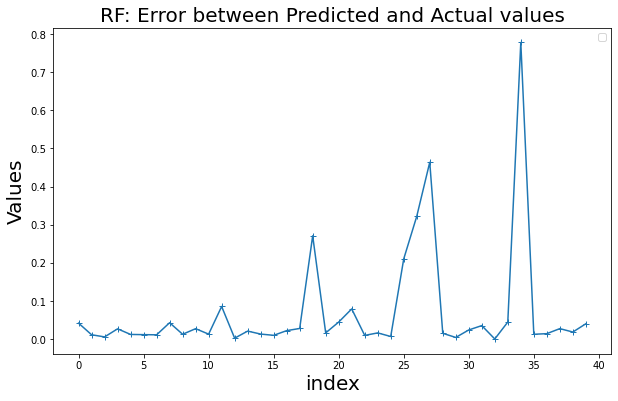

In [44]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Random Forest with cross-validation
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=1), param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)
cv_scores_rf = cross_val_score(grid_search_rf, X_train, y_train, cv=5, scoring='r2')
y_pred_train_rf = grid_search_rf.predict(X_train)
y_pred_test_rf = grid_search_rf.predict(X_test)

# Best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_

# Calculate R2 and MSE for training data
r2_train_rf = r2_score(y_train, y_pred_train_rf)
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)

# Calculate R2 and MSE for testing data
r2_test_rf = r2_score(y_test, y_pred_test_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)

r2_scores['Random Forest'] = r2_test_rf
mse_scores['Random Forest'] = mse_test_rf

r2_scores_train['Random Forest'] = r2_train_rf
mse_scores_train['Random Forest'] = mse_train_rf

print(f"Cross-validated R2 scores for Random Forest: {cv_scores_rf}")
print(f"Training R2 score for Random Forest: {r2_train_rf}")
print(f"Testing R2 score for Random Forest: {r2_test_rf}")
print(f"Training MSE for Random Forest: {mse_train_rf}")
print(f"Testing MSE for Random Forest: {mse_test_rf}")
print(f"Best parameters for Random Forest: {best_params_rf}")

# Plotting Actual vs Predicted for Testing Data
y_test = np.array(y_test)
fig = plt.figure(figsize = (10,6))
t = np.arange(len(y_test))
plt.plot(t, y_test, label = 'Actual Values', marker = 'o', color='blue')
plt.plot(t, y_pred_test_rf, label = 'Predicted Values', marker = '*', color='red')
plt.title('RF: Predicted values Vs Actual values' ,fontsize = 20)
plt.xlabel('index',fontsize = 20)
plt.ylabel('Values', fontsize = 20)
plt.legend()

plt.show()

error = []
er=0
ind = 0
for i in range(len(y_test)):
    error.append(abs(y_test[i] - y_pred_test_rf[i]))
    if(abs(y_test[i] - y_pred_test_rf[i]) > er):
        er = abs(y_test[i] - y_pred_test_rf[i])
        ind = i
        
        fig = plt.figure(figsize = (10,6))
t = np.arange(len(y_test))
plt.plot(t, error, marker = '+')
# plt.plot(t, y_pred_test_knn, label = 'Predicted Values')
plt.title('RF: Error between Predicted and Actual values' ,fontsize = 20)
plt.xlabel('index',fontsize = 20)
plt.ylabel('Values', fontsize = 20)
plt.legend()

plt.show()


In [45]:
grid_search_rf.predict([[7,2.223,8.8380]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6.90742132])

In [46]:
grid_search_rf.predict([[1,0.1814,3.667]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.78320234])

In [47]:
grid_search_rf.predict([[12,2.7465,10.633]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([8.23669146])

In [48]:
grid_search_rf.predict([[1,0.1601,7.332]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5.61868023])

In [49]:
grid_search_rf.predict([[8,1.843,11.038]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([8.40971026])

In [50]:
grid_search_rf.predict([[6,0.086,0.3864]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.43586942])

In [51]:
grid_search_rf.predict([[11,0.5135,2.9002]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.22528071])

Cross-validated R2 scores for GBM: [0.99947416 0.99931691 0.99975697 0.99955198 0.99746529]
Training R2 score for GBM: 0.9999995140709484
Testing R2 score for GBM: 0.9978162345460659
Training MSE for GBM: 1.132477261323836e-05
Testing MSE for GBM: 0.025514467286826232
Best parameters for GBM: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


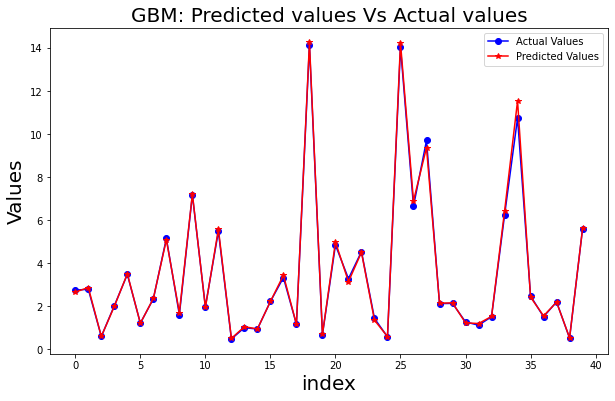

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

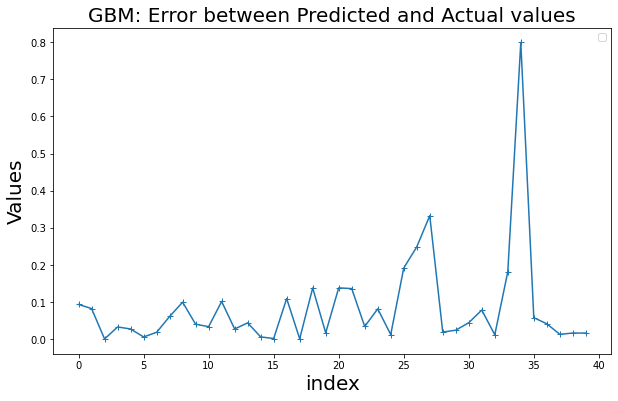

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# GBM with cross-validation
param_grid_gbm = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
grid_search_gbm = GridSearchCV(GradientBoostingRegressor(random_state=1), param_grid_gbm, cv=5, scoring='r2')
grid_search_gbm.fit(X_train, y_train)
cv_scores_gbm = cross_val_score(grid_search_gbm, X_train, y_train, cv=5, scoring='r2')
y_pred_train_gbm = grid_search_gbm.predict(X_train)
y_pred_test_gbm = grid_search_gbm.predict(X_test)

# Best parameters for GBM
best_params_gbm = grid_search_gbm.best_params_

# Calculate R2 and MSE for training data
r2_train_gbm = r2_score(y_train, y_pred_train_gbm)
mse_train_gbm = mean_squared_error(y_train, y_pred_train_gbm)

# Calculate R2 and MSE for testing data
r2_test_gbm = r2_score(y_test, y_pred_test_gbm)
mse_test_gbm = mean_squared_error(y_test, y_pred_test_gbm)

r2_scores['GBM'] = r2_test_gbm
mse_scores['GBM'] = mse_test_gbm

r2_scores_train['GBM'] = r2_train_gbm
mse_scores_train['GBM'] = mse_train_gbm

print(f"Cross-validated R2 scores for GBM: {cv_scores_gbm}")
print(f"Training R2 score for GBM: {r2_train_gbm}")
print(f"Testing R2 score for GBM: {r2_test_gbm}")
print(f"Training MSE for GBM: {mse_train_gbm}")
print(f"Testing MSE for GBM: {mse_test_gbm}")
print(f"Best parameters for GBM: {best_params_gbm}")

# Plotting Actual vs Predicted for Testing Data
y_test = np.array(y_test)
fig = plt.figure(figsize = (10,6))
t = np.arange(len(y_test))
plt.plot(t, y_test, label = 'Actual Values', marker = 'o', color='blue')
plt.plot(t, y_pred_test_gbm, label = 'Predicted Values', marker = '*', color='red')
plt.title('GBM: Predicted values Vs Actual values' ,fontsize = 20)
plt.xlabel('index',fontsize = 20)
plt.ylabel('Values', fontsize = 20)
plt.legend()

plt.show()

error = []
er=0
ind = 0
for i in range(len(y_test)):
    error.append(abs(y_test[i] - y_pred_test_gbm[i]))
    if(abs(y_test[i] - y_pred_test_gbm[i]) > er):
        er = abs(y_test[i] - y_pred_test_gbm[i])
        ind = i
        
        fig = plt.figure(figsize = (10,6))
t = np.arange(len(y_test))
plt.plot(t, error, marker = '+')
# plt.plot(t, y_pred_test_knn, label = 'Predicted Values')
plt.title('GBM: Error between Predicted and Actual values' ,fontsize = 20)
plt.xlabel('index',fontsize = 20)
plt.ylabel('Values', fontsize = 20)
plt.legend()

plt.show()


In [53]:
grid_search_gbm.predict([[7,2.223,8.8380]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([6.94102688])

In [54]:
grid_search_gbm.predict([[1,0.1814,3.667]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([2.80732968])

In [55]:
grid_search_gbm.predict([[12,2.7465,10.633]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([7.9687214])

In [56]:
# grid_search_gbm.predict([[7,2.223,8.8380, 5.461627]])

In [57]:
grid_search_gbm.predict([[1,0.1601,7.332]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([5.64023049])

In [58]:
grid_search_gbm.predict([[8,1.843,11.038]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([8.38689727])

In [59]:
grid_search_gbm.predict([[6,0.086,0.3864]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([0.43920139])

In [60]:
grid_search_gbm.predict([[11,0.5135,2.9002]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([2.19721813])

Cross-validated R2 scores for XGBoost: [0.99736857 0.9976939  0.99886817 0.9983409  0.99225199]
Training R2 score for XGBoost: 0.9999997981467103
Testing R2 score for XGBoost: 0.9924202199942797
Training MSE for XGBoost: 4.704272363990876e-06
Testing MSE for XGBoost: 0.08855989943832501
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


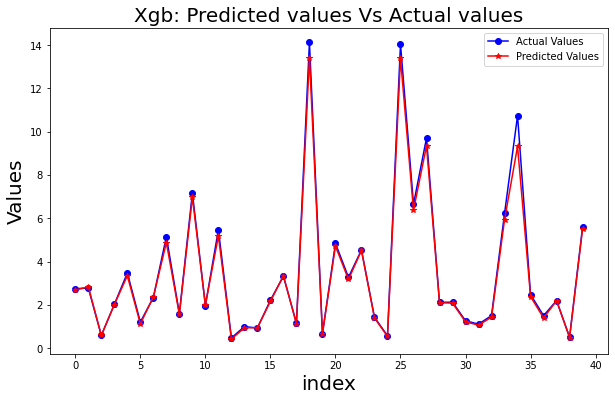

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

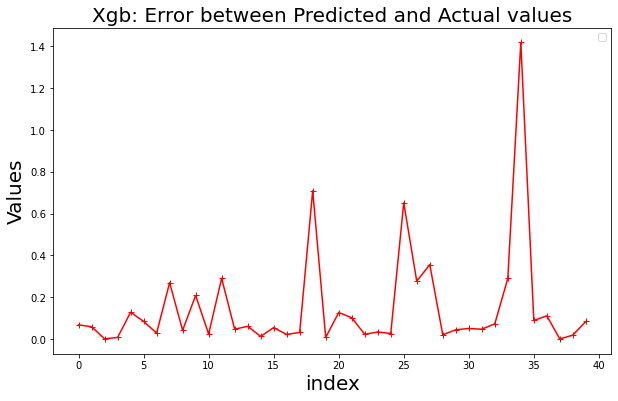

In [61]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# XGBoost with cross-validation
param_grid_xgb = {'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200]}
grid_search_xgb = GridSearchCV(xgb.XGBRegressor(random_state=1), param_grid_xgb, cv=5, scoring='r2')
grid_search_xgb.fit(X_train, y_train)
cv_scores_xgb = cross_val_score(grid_search_xgb, X_train, y_train, cv=5, scoring='r2')
y_pred_train_xgb = grid_search_xgb.predict(X_train)
y_pred_test_xgb = grid_search_xgb.predict(X_test)

# Best parameters for XGBoost
best_params_xgb = grid_search_xgb.best_params_

# Calculate R2 and MSE for training data
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)

# Calculate R2 and MSE for testing data
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)

r2_scores['XGBoost'] = r2_test_xgb
mse_scores['XGBoost'] = mse_test_xgb

r2_scores_train['XGBoost'] = r2_train_xgb
mse_scores_train['XGBoost'] = mse_train_xgb

print(f"Cross-validated R2 scores for XGBoost: {cv_scores_xgb}")
print(f"Training R2 score for XGBoost: {r2_train_xgb}")
print(f"Testing R2 score for XGBoost: {r2_test_xgb}")
print(f"Training MSE for XGBoost: {mse_train_xgb}")
print(f"Testing MSE for XGBoost: {mse_test_xgb}")
print(f"Best parameters for XGBoost: {best_params_xgb}")

# Plotting Actual vs Predicted for Testing Data
y_test = np.array(y_test)
fig = plt.figure(figsize = (10,6))
t = np.arange(len(y_test))
plt.plot(t, y_test, label = 'Actual Values', marker = 'o', color='blue')
plt.plot(t, y_pred_test_xgb, label = 'Predicted Values', marker = '*', color='red')
plt.title('Xgb: Predicted values Vs Actual values' ,fontsize = 20)
plt.xlabel('index',fontsize = 20)
plt.ylabel('Values', fontsize = 20)
plt.legend()

plt.show()

error = []
er=0
ind = 0
for i in range(len(y_test)):
    error.append(abs(y_test[i] - y_pred_test_xgb[i]))
    if(abs(y_test[i] - y_pred_test_xgb[i]) > er):
        er = abs(y_test[i] - y_pred_test_xgb[i])
        ind = i
        
        fig = plt.figure(figsize = (10,6))
t = np.arange(len(y_test))
plt.plot(t, error, marker = '+',  color='red')
# plt.plot(t, y_pred_test_knn, label = 'Predicted Values')
plt.title('Xgb: Error between Predicted and Actual values' ,fontsize = 20)
plt.xlabel('index',fontsize = 20)
plt.ylabel('Values', fontsize = 20)
plt.legend()

plt.show()


In [62]:
grid_search_xgb.predict([[7,2.223,8.8380]])

array([6.413296], dtype=float32)

In [63]:
grid_search_xgb.predict([[1,0.1814,3.667]])

array([2.683207], dtype=float32)

In [64]:
grid_search_xgb.predict([[12,1.867,11.038]])

array([8.328995], dtype=float32)

In [65]:
grid_search_xgb.predict([[1,0.1601,7.332]])

array([5.477797], dtype=float32)

In [66]:
grid_search_xgb.predict([[8,1.843,11.038]])

array([8.339022], dtype=float32)

In [67]:
grid_search_xgb.predict([[6,0.086,0.3864]])

array([0.3850365], dtype=float32)

In [68]:
grid_search_xgb.predict([[11,0.5135,2.9002]])

array([2.214713], dtype=float32)

In [69]:
r2_scores_train

{'KNN': 1.0,
 'SVR': 0.9999905622982476,
 'Decision Tree': 0.9999999224268875,
 'Random Forest': 0.999897653083293,
 'GBM': 0.9999995140709484,
 'XGBoost': 0.9999997981467103}

In [70]:
mse_scores_train

{'KNN': 0.0,
 'SVR': 0.00021994944732985108,
 'Decision Tree': 1.8078726865209629e-06,
 'Random Forest': 0.002385236189502843,
 'GBM': 1.132477261323836e-05,
 'XGBoost': 4.704272363990876e-06}

In [71]:
r2_scores

{'KNN': 0.994701081086562,
 'SVR': 0.999985310691379,
 'Decision Tree': 0.9975720945299711,
 'Random Forest': 0.9977045398088688,
 'GBM': 0.9978162345460659,
 'XGBoost': 0.9924202199942797}

In [72]:
mse_scores

{'KNN': 0.06191099553704217,
 'SVR': 0.00017162552123124123,
 'Decision Tree': 0.028366926758989386,
 'Random Forest': 0.02681947543831729,
 'GBM': 0.025514467286826232,
 'XGBoost': 0.08855989943832501}

In [73]:
r2_scores_test = r2_scores
r2_scores_test

{'KNN': 0.994701081086562,
 'SVR': 0.999985310691379,
 'Decision Tree': 0.9975720945299711,
 'Random Forest': 0.9977045398088688,
 'GBM': 0.9978162345460659,
 'XGBoost': 0.9924202199942797}

In [74]:
mse_scores_test = mse_scores
mse_scores_test

{'KNN': 0.06191099553704217,
 'SVR': 0.00017162552123124123,
 'Decision Tree': 0.028366926758989386,
 'Random Forest': 0.02681947543831729,
 'GBM': 0.025514467286826232,
 'XGBoost': 0.08855989943832501}

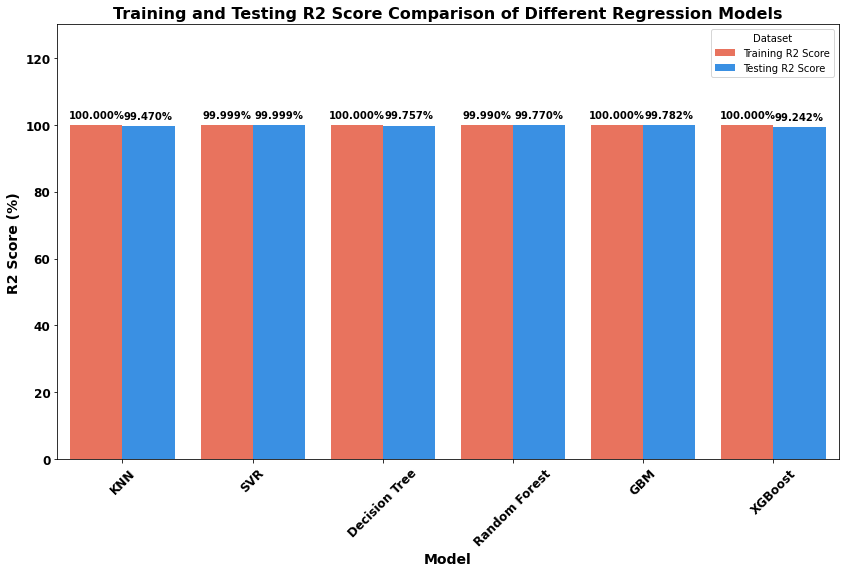

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming r2_scores_train and r2_scores_test are defined
# Creating a DataFrame from the dictionaries
r2_df = pd.DataFrame({
    'Model': list(r2_scores_train.keys()),
    'Training R2 Score': [val * 100 for val in r2_scores_train.values()],
    'Testing R2 Score': [val * 100 for val in r2_scores_test.values()]
})

# Melt the DataFrame to have a suitable format for seaborn's barplot
r2_df_melted = r2_df.melt(id_vars='Model', value_vars=['Training R2 Score', 'Testing R2 Score'], 
                          var_name='Dataset', value_name='R2 Score (%)')

# Plotting the R2 scores side by side
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Model', y='R2 Score (%)', hue='Dataset', data=r2_df_melted, palette=['tomato', 'dodgerblue'])

# Adding exact R2 scores in percentage format on bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.3f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points', 
                     fontsize=10, color='black', fontweight='bold')

# Setting bold font for axis labels and title
plt.ylabel('R2 Score (%)', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.title('Training and Testing R2 Score Comparison of Different Regression Models', fontsize=16, fontweight='bold')

# Rotating x-axis labels and making them bold
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Set y-axis limit from 0 to 130 for percentage representation
plt.ylim(0, 130)

plt.show()


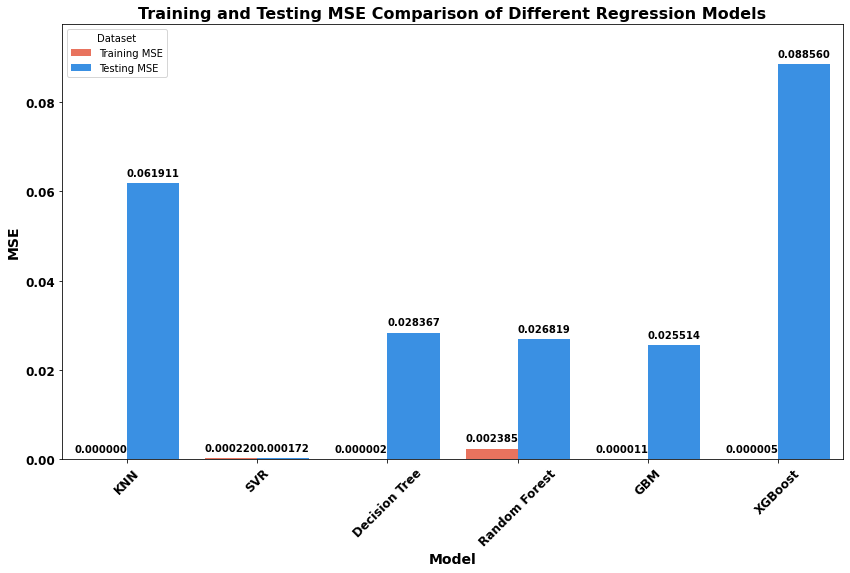

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming mse_scores_train and mse_scores_test are defined
# Creating a DataFrame from the dictionaries
mse_df = pd.DataFrame({
    'Model': list(mse_scores_train.keys()),
    'Training MSE': list(mse_scores_train.values()),
    'Testing MSE': list(mse_scores_test.values())
})

# Melt the DataFrame to have a suitable format for seaborn's barplot
mse_df_melted = mse_df.melt(id_vars='Model', value_vars=['Training MSE', 'Testing MSE'], 
                            var_name='Dataset', value_name='MSE')

# Plotting the MSE scores side by side
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Model', y='MSE', hue='Dataset', data=mse_df_melted, palette=['tomato', 'dodgerblue'])

# Adding exact MSE scores on bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.6f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points', 
                     fontsize=10, color='black', fontweight='bold')

# Setting bold font for axis labels and title
plt.ylabel('MSE', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.title('Training and Testing MSE Comparison of Different Regression Models', fontsize=16, fontweight='bold')

# Rotating x-axis labels and making them bold
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Set y-axis limit for better visualization
plt.ylim(0, max(max(mse_scores_train.values()), max(mse_scores_test.values())) * 1.1)

plt.show()


In [77]:
# # Plotting R2 Score Comparison with bars in percentage format
# plt.figure(figsize=(12, 8))
# barplot = sns.barplot(x=list(r2_scores.keys()), y=[val * 100 for val in r2_scores.values()], palette='viridis')
# plt.ylabel('R2 Score (%)')
# plt.title('R2 Score Comparison of Different Regression Models')

# # Adding exact R2 scores in percentage format on bars
# for idx, val in enumerate(r2_scores.values()):
#     barplot.text(idx, val * 100 + 1, f'{val * 100:.3f}%', ha='center', color='black', fontsize=10)

# plt.xticks(rotation=45)
# plt.ylim(0, 110)  # Set y-axis limit from 0 to 110 for percentage representation
# plt.show()


In [78]:
# # Plotting MSE Score Comparison with bars in absolute format
# plt.figure(figsize=(12, 8))
# barplot_mse = sns.barplot(x=list(mse_scores.keys()), y=list(mse_scores.values()), palette='viridis')
# plt.ylabel('MSE Score')
# plt.title('MSE Score Comparison of Different Regression Models')

# # Adding exact MSE scores on top of bars
# for idx, val in enumerate(mse_scores.values()):
#     barplot_mse.text(idx, val + 0.001, f'{val:.5f}', ha='center', color='black', fontsize=10)

# plt.xticks(rotation=45)
# plt.ylim(0, 0.025)  # Set y-axis limit from 0 to 0.025 for MSE scores
# plt.show()


In [79]:
data

,Relay Height,Amplitude,Time Period,Time Constant,Delay
0,6.0,0.0655,2.5988,48.241712,1.959681
1,6.0,0.0830,2.7200,39.844859,2.054050
2,6.0,0.0960,2.8004,35.466772,2.117041
3,6.0,0.0840,2.8240,40.875800,2.132764
4,6.0,0.0625,2.8216,54.891868,2.127160
...,...,...,...,...,...
191,12.0,0.3530,18.4440,127.028622,14.036070
192,12.0,0.2600,20.3600,190.405133,15.434983
193,12.0,0.2770,21.5952,189.558470,16.382866
194,12.0,0.3115,22.1608,172.971370,16.835846
